K Nearst Neighbors: Digit recognition

In [7]:
from sklearn.datasets import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

MNIST est une base de données étiquetée. Pour chaque chiffre, une représentation sous forme d’image (de taille 8x8 pixels) ainsi que son étiquette sont fournies. Le jeu de données MNIST comporte 1797 chiffres que nous diviserons en deux sous-ensembles : Apprentissage et test. 

In [ ]:
digit = load_digits() # 1797 8x8 pixel images of digits from 0 to 9

Voici une simple visualisation d'un chiffre de la base.

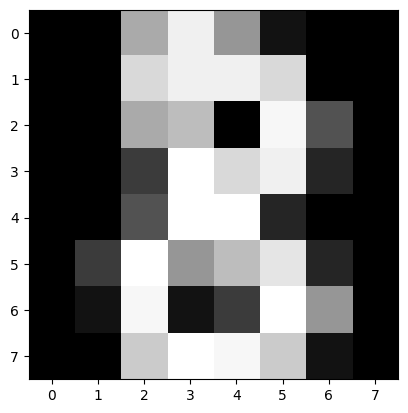

In [4]:
plt.imshow(digit['images'][8], cmap='Greys_r')
plt.show()

In [9]:
train_x = digit.data 
train_y = digit.target

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.25)

Pour entraîner un K-NN, on utilise la librairie SickitLearn qui propose la classe KNeighborsClassifier. On va faire varier le nombre de voisins k puis tester la performance de notre classifieur selon k.

The maximum accuracy is: 0.9866666666666667 for k in [9]


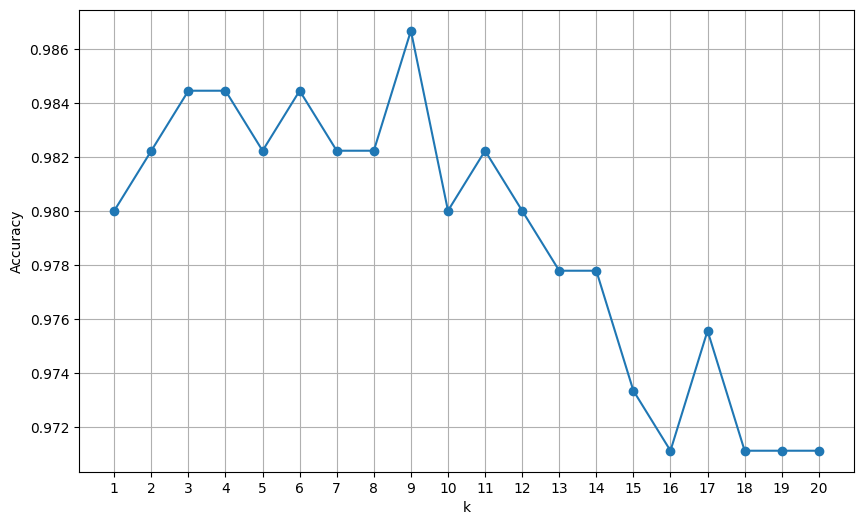

In [19]:
k_values = list(range(1, 21)) # Test for k from 1 to 20
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) 
    # or simply knn.score(x_test, y_test)
    accuracy_scores.append(accuracy) 

max_accuracy = max(accuracy_scores)
max_indices = [i+1 for i, score in enumerate(accuracy_scores) if score == max_accuracy]
print(f"The maximum accuracy is: {max_accuracy} for k in {max_indices}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

D'après le graphique ci-dessus, nous voyons que si la valeur k est 9, la précision est élevée. Ainsi, nous sélectionnons la valeur k par expérience (L'objectif de KNN est de trouver la majorité des classes parmi les k voisins, mais le choix optimal de k dépend uniquement de la distribution des données, pas du nombre de classes.)